# Preprocessing

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer

**Import Dataset**

In [ ]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ahsan81/used-handheld-device-data",
  "used_device_data.csv"
)

/tmp/ipython-input-441/2488108494.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 272k/272k [00:00<00:00, 8.89MB/s]


In [ ]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


Mencari *Missing Values*

In [ ]:
df.isnull().sum()

,0
device_brand,0
os,0
screen_size,0
4g,0
5g,0
rear_camera_mp,179
front_camera_mp,2
internal_memory,4
ram,4
battery,6


Mengganti *Missing Values* dengan Median

In [ ]:
num_cols = df.isnull().sum() != 0
df.loc[:, num_cols] = df.loc[:, num_cols].fillna(df.loc[:, num_cols].median())

In [ ]:
df.isnull().sum()

,0
device_brand,0
os,0
screen_size,0
4g,0
5g,0
rear_camera_mp,0
front_camera_mp,0
internal_memory,0
ram,0
battery,0


Missing Values dengan KNN Imputer

In [ ]:
#def knn_imputer(colnames):
#   imputer = KNNImputer(n_neighbors=5)
#   df[colnames] = imputer.fit_transform(df[[colnames]])
#   return colnames

#numeric_cols = df.isnull().sum() != 0

#for i in numeric_cols[numeric_cols == True].index:
#   knn_imputer(i)

In [ ]:
df.isnull().sum()

,0
device_brand,0
os,0
screen_size,0
4g,0
5g,0
rear_camera_mp,0
front_camera_mp,0
internal_memory,0
ram,0
battery,0


*Explanotary Data Analysis*

In [ ]:
# Display basic information about the dataframe
df.info()

# Display descriptive statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.384534,6.553329,54.546957,4.036080,3133.170961,182.705761,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.700148,6.968453,84.926611,1.364314,1298.565062,88.329494,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


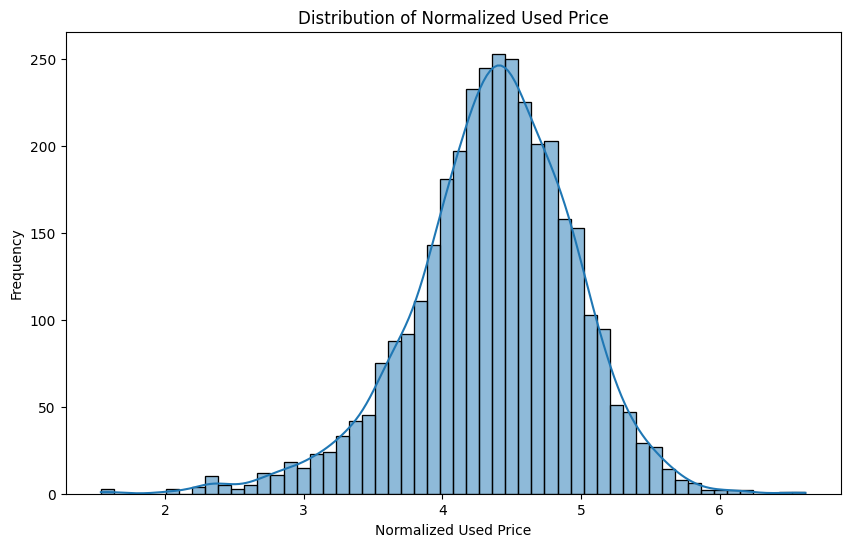

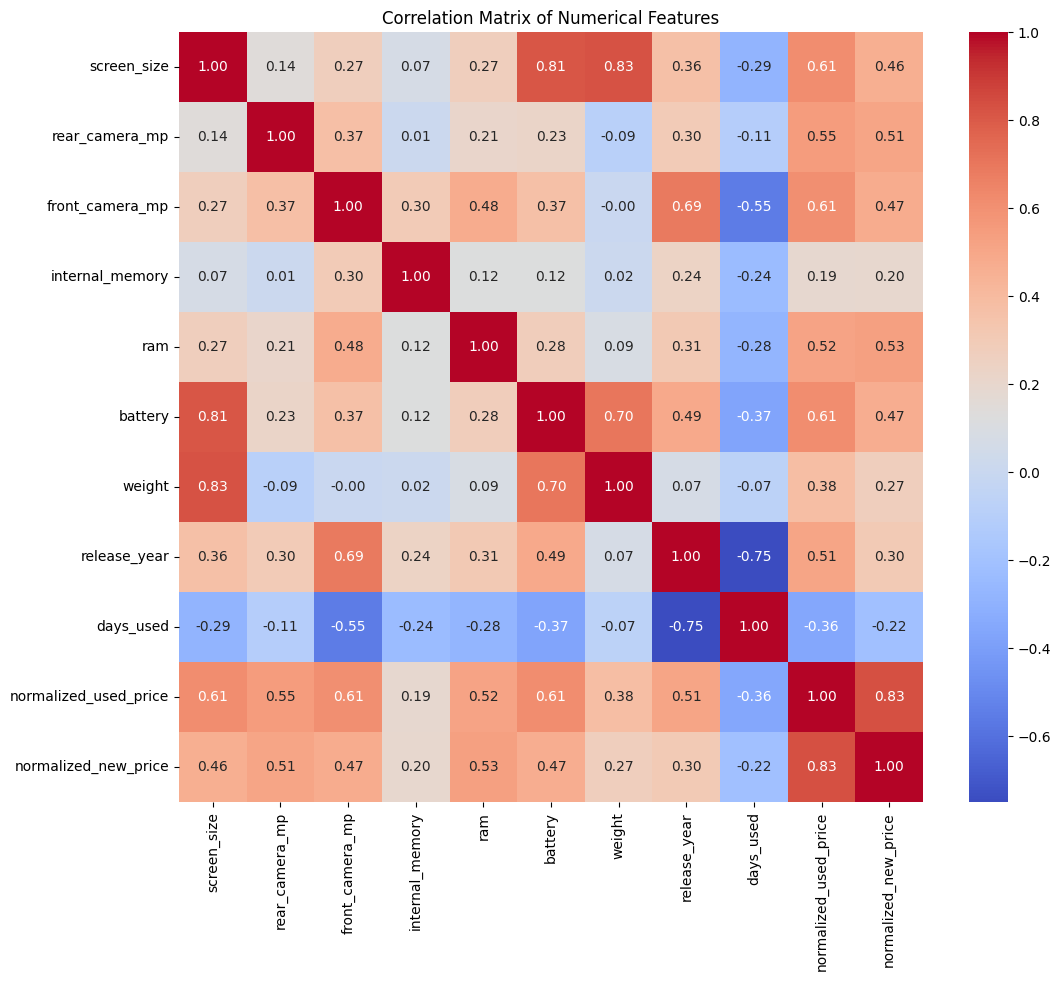

In [ ]:
# Plot histogram of the target variable 'normalized_used_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_used_price'], kde=True)
plt.title('Distribution of Normalized Used Price')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

# Plotting a correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

*Label Endcoding*

In [ ]:
os = pd.get_dummies(df["os"], prefix = "os", drop_first = True)
g4 = pd.get_dummies(df["4g"], prefix = "g4", drop_first = True)
g5 = pd.get_dummies(df["5g"], prefix = "g5", drop_first = True)

In [ ]:
df = pd.concat([df, os, g4, g5], axis=1)
df.drop(columns=['os', '4g', '5g'], inplace=True)

Target Encoding

In [ ]:
#Target Encoding sebelum Split
#brand_mean_price = df.groupby('device_brand')['normalized_used_price'].mean()
#df['device_brand'] = df['device_brand'].map(brand_mean_price)

One Hot Encoding

In [ ]:
#brand_dummies = pd.get_dummies(df["device_brand"],
 #                              prefix="brand",
  #                             drop_first=True)

#df = pd.concat([df, brand_dummies], axis=1)
#df.drop(columns=["device_brand"], inplace=True)

Label Encoding

In [ ]:
#non_numeric = df.select_dtypes(include='object')
#non_numeric_cols = non_numeric.columns
#print(non_numeric_cols)

#for i in non_numeric_cols:
#  ec = LabelEncoder()
#  df[i] = ec.fit_transform(df[i])

In [ ]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()

,device_brand,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS,g4_yes,g5_yes
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0,1,0
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0,1,1
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0,1,1
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,0,0,1,1
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0,1,0


*split*

In [ ]:
# Pisahkan Fitur (X) dan Target (y)
X = df.drop('normalized_used_price', axis=1)
y = df['normalized_used_price']

# 2. Split Data (80% Latih, 20% Uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Target Encoding

In [ ]:
# gabungkan sementara
train_temp = X_train.copy()
train_temp["target"] = y_train

# hitung mean hanya dari training data
brand_mean = train_temp.groupby("device_brand")["target"].mean()

X_train["device_brand"] = X_train["device_brand"].map(brand_mean)
X_test["device_brand"] = X_test["device_brand"].map(brand_mean)
global_mean = y_train.mean()

X_test["device_brand"].fillna(global_mean, inplace=True)

/tmp/ipython-input-441/678653726.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["device_brand"].fillna(global_mean, inplace=True)


*Scaling*

In [ ]:
scaler = StandardScaler()

# 3. Fit hanya pada data training, lalu transform keduanya
X_train_scaled = scaler.fit_transform(X_train) # Menghitung rata-rata & std dari X_train
X_test_scaled = scaler.transform(X_test)

# Ubah array hasil scaling kembali menjadi DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
X_test_scaled_df.head()
X_train_scaled_df.head()

,device_brand,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,g4_yes,g5_yes
0,0.906567,3.091693,0.764256,0.214228,0.108916,-0.027180,3.375728,3.517239,0.887710,-0.565414,1.073120,-0.205544,-0.145135,-0.102991,0.688757,-0.20934
1,-0.612422,-0.876081,-0.294399,-0.656231,-0.263300,-0.027180,-0.794343,-0.368365,-0.862686,1.410478,-0.884391,-0.205544,-0.145135,-0.102991,-1.451891,-0.20934
2,-0.184099,-0.228653,0.764256,-0.221001,0.108916,-0.027180,-0.099331,-0.379531,0.450111,0.279088,-0.302059,-0.205544,-0.145135,-0.102991,0.688757,-0.20934
3,-0.612422,-0.262454,0.764256,-0.221001,-0.449409,-0.027180,-0.601284,-0.614007,-0.425087,0.194233,0.099427,-0.205544,-0.145135,-0.102991,0.688757,-0.20934
4,1.322417,0.689187,-0.294399,1.374839,0.853349,1.463459,0.981799,0.351812,1.762907,-2.112995,1.397922,-0.205544,-0.145135,-0.102991,0.688757,4.77692


# Baseline Test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

Fungsi

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"\n===== {model_name} =====")
    print(f"R2   : {r2:.6f}")
    print(f"MAE  : {mae:.6f}")
    print(f"RMSE : {rmse:.6f}")
    print(f"MAPE : {mape:.6f}")

Model Baseline LinearRegression

In [ ]:
model_baseline_LR = LinearRegression()
model_baseline_LR.fit(X_train_scaled_df, y_train)
y_pred_baseline_LR = model_baseline_LR.predict(X_test_scaled_df)

Model Lasso Regression

In [ ]:
model_Lasso = Lasso(alpha=0.1, random_state=42)
model_Lasso.fit(X_train_scaled_df, y_train)
y_pred_Lasso = model_Lasso.predict(X_test_scaled_df)

OUTPUT & PERBANDINGAN

In [ ]:
evaluate_model(y_test, y_pred_baseline_LR, "Baseline: Linear Regression")
evaluate_model(y_test, y_pred_Lasso, "Baseline: Lasso (alpha=0.1)")


===== Baseline: Linear Regression =====
R2   : 0.836402
MAE  : 0.184987
RMSE : 0.230414
MAPE : 0.043594

===== Baseline: Lasso (alpha=0.1) =====
R2   : 0.777827
MAE  : 0.215400
RMSE : 0.268513
MAPE : 0.051602


# Code Improvement

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

Ridge & Lasso

In [ ]:
y_train_log = np.log1p(y_train)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled_df, y_train_log)

ridge_pred_log = ridge_model.predict(X_test_scaled_df)
ridge_pred = np.expm1(ridge_pred_log)

In [ ]:
lasso_model = Lasso(alpha=0.001, max_iter=10000)
lasso_model.fit(X_train_scaled_df, y_train_log)

lasso_pred_log = lasso_model.predict(X_test_scaled_df)
lasso_pred = np.expm1(lasso_pred_log)

In [ ]:
evaluate_model(y_test, ridge_pred, "Ridge Regression (Improved)")
evaluate_model(y_test, lasso_pred, "Lasso Regression (Improved)")


===== Ridge Regression (Improved) =====
R2   : 0.818836
MAE  : 0.192524
RMSE : 0.242468
MAPE : 0.045284

===== Lasso Regression (Improved) =====
R2   : 0.818778
MAE  : 0.193640
RMSE : 0.242508
MAPE : 0.045629


Polynomial Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled_df)
X_test_poly = poly.transform(X_test_scaled_df)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

poly_pred = poly_model.predict(X_test_poly)

evaluate_model(y_test, poly_pred, "Polynomial Linear Regression")


===== Polynomial Linear Regression =====
R2   : 0.852135
MAE  : 0.174570
RMSE : 0.219055
MAPE : 0.040810


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled_df)
X_test_poly = poly.transform(X_test_scaled_df)

poly_ridge = Ridge(alpha=1.0)
poly_ridge.fit(X_train_poly, y_train_log)
poly_pred = np.expm1(poly_ridge.predict(X_test_poly))

evaluate_model(y_test, poly_pred, "Polynomial Ridge")


===== Polynomial Ridge =====
R2   : 0.846937
MAE  : 0.177034
RMSE : 0.222871
MAPE : 0.041268


K-Fold Evaluation

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline

def kfold_evaluate(model, X, y, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {
        "r2": "r2",
        "mae": "neg_mean_absolute_error",
        "rmse": "neg_root_mean_squared_error",
        "mape": "neg_mean_absolute_percentage_error"
    }

    scores = cross_validate(
        model,
        X,
        y,
        cv=kf,
        scoring=scoring,
        return_train_score=False
    )

    print(f"\n===== K-FOLD RESULT : {model_name} =====")
    print(f"Mean R2   : {scores['test_r2'].mean():.6f}")
    print(f"Mean MAE  : {-scores['test_mae'].mean():.6f}")
    print(f"Mean RMSE : {-scores['test_rmse'].mean():.6f}")
    print(f"Mean MAPE : {-scores['test_mape'].mean():.6f}")

In [ ]:
kfold_evaluate(
    LinearRegression(),
    X_train_scaled_df,
    y_train,
    "Linear Regression"
)


===== K-FOLD RESULT : Linear Regression =====
Mean R2   : 0.840088
Mean MAE  : 0.183548
Mean RMSE : 0.236885
Mean MAPE : 0.044354


In [ ]:
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

kfold_evaluate(
    ridge_pipeline,
    X_train,
    y_train_log,
    "Ridge Regression"
)


===== K-FOLD RESULT : Ridge Regression =====
Mean R2   : 0.822331
Mean MAE  : 0.036354
Mean RMSE : 0.049316
Mean MAPE : 0.022459


In [ ]:
lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=0.001, max_iter=10000))
])

kfold_evaluate(
    lasso_pipeline,
    X_train,
    y_train_log,
    "Lasso Regression"
)


===== K-FOLD RESULT : Lasso Regression =====
Mean R2   : 0.821583
Mean MAE  : 0.036526
Mean RMSE : 0.049431
Mean MAPE : 0.022601


In [ ]:
poly_lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

kfold_evaluate(
    poly_lr_pipeline,
    X_train,
    y_train,
    "Polynomial Linear Regression"
)


===== K-FOLD RESULT : Polynomial Linear Regression =====
Mean R2   : 0.845728
Mean MAE  : 0.179989
Mean RMSE : 0.232490
Mean MAPE : 0.043079


In [ ]:
poly_ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Ridge(alpha=1.0))
])

kfold_evaluate(
    poly_ridge_pipeline,
    X_train,
    y_train_log,
    "Polynomial Ridge Regression"
)


===== K-FOLD RESULT : Polynomial Ridge Regression =====
Mean R2   : 0.842728
Mean MAE  : 0.034583
Mean RMSE : 0.046306
Mean MAPE : 0.021227


# Stress Test

EXTREME DISTRIBUTION SHIFT TEST

In [ ]:
print("\n--- STRESS TEST 1 : EXTREME DISTRIBUTION SHIFT ---")

import numpy as np
import pandas as pd

# Ambil mean & std dari training (SEBELUM scaling)
mean_vals = X_train.mean()
std_vals = X_train.std()

# Buat skenario ekstrem
extreme_high = mean_vals + 3 * std_vals
extreme_low = mean_vals - 3 * std_vals

# Ubah jadi DataFrame agar feature names tetap ada
extreme_high_df = pd.DataFrame([extreme_high], columns=X_train.columns)
extreme_low_df = pd.DataFrame([extreme_low], columns=X_train.columns)

# Scaling (tetap pakai DataFrame)
extreme_high_scaled = scaler.transform(extreme_high_df)
extreme_low_scaled = scaler.transform(extreme_low_df)

# Ubah kembali jadi DataFrame setelah scaling
extreme_high_scaled_df = pd.DataFrame(extreme_high_scaled, columns=X_train.columns)
extreme_low_scaled_df = pd.DataFrame(extreme_low_scaled, columns=X_train.columns)

# Polynomial transform
extreme_high_poly = poly.transform(extreme_high_scaled_df)
extreme_low_poly = poly.transform(extreme_low_scaled_df)

# Prediksi
pred_high = poly_model.predict(extreme_high_poly)
pred_low = poly_model.predict(extreme_low_poly)

print("Prediksi Harga Spek Ekstrem Tinggi :", float(pred_high[0]))
print("Prediksi Harga Spek Ekstrem Rendah :", float(pred_low[0]))


--- STRESS TEST 1 : EXTREME DISTRIBUTION SHIFT ---
Prediksi Harga Spek Ekstrem Tinggi : 6.007975616091041
Prediksi Harga Spek Ekstrem Rendah : 1.096739181731341


NOISE STRESS TEST

In [ ]:
print("\n--- STRESS TEST 2 : NOISE INJECTION ---")

import numpy as np

# Tambahkan noise kecil (5% dari skala)
noise = np.random.normal(0, 0.05, X_test_scaled_df.shape)

X_test_noisy = X_test_scaled_df + noise

# Prediksi pakai model polynomial
X_test_noisy_poly = poly.transform(X_test_noisy)
y_pred_noisy = poly_model.predict(X_test_noisy_poly)

evaluate_model(y_test, y_pred_noisy, "Polynomial Regression (Noisy Data)")


--- STRESS TEST 2 : NOISE INJECTION ---

===== Polynomial Regression (Noisy Data) =====
R2   : 0.852291
MAE  : 0.175046
RMSE : 0.218939
MAPE : 0.040904


OUTLIER STRESS TEST

In [ ]:
print("\n--- STRESS TEST 3 : OUTLIER SENSITIVITY ---")

import numpy as np
import pandas as pd

# Hitung IQR pada target training
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Mask non-outlier
mask_no_outlier = (y_train >= lower_bound) & (y_train <= upper_bound)

print("Jumlah data sebelum:", len(y_train))
print("Jumlah data setelah buang outlier:", mask_no_outlier.sum())


--- STRESS TEST 3 : OUTLIER SENSITIVITY ---
Lower Bound: 2.9443118724999997
Upper Bound: 5.837777276500001
Jumlah data sebelum: 2763
Jumlah data setelah buang outlier: 2691


TOP 5 ERROR ANALYSIS

In [ ]:
print("\n--- STRESS TEST 4 : TOP 5 ERROR ANALYSIS ---")

import pandas as pd
import numpy as np

# Prediksi ulang supaya sinkron
X_test_poly = poly.transform(X_test_scaled_df)
poly_pred = poly_model.predict(X_test_poly)

# Hitung error absolut
error = np.abs(y_test.values - poly_pred)

# Buat dataframe analisis
error_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": poly_pred,
    "Absolute_Error": error
})

# Ambil 5 error terbesar
top5_error = error_df.sort_values(by="Absolute_Error", ascending=False).head(5)

top5_error


--- STRESS TEST 4 : TOP 5 ERROR ANALYSIS ---


,Actual,Predicted,Absolute_Error
626,5.698535,4.789236,0.909300
645,2.896464,3.750638,0.854173
540,3.174297,3.963807,0.789510
255,3.421000,4.144460,0.723460
313,4.070905,4.766467,0.695561


# Experiment

Ridge

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100]
}

param_grid_lasso = {
    "alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]
}

rmse_scorer = make_scorer(
    mean_squared_error,
    greater_is_better=False,
    squared=False
)

y_train_log = np.log1p(y_train)

In [ ]:
ridge = Ridge()

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled_df, y_train_log)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict', squared=False))

In [ ]:
print("Best Alpha:", grid_search.best_params_)

Best Alpha: {'alpha': 0.001}


In [ ]:
best_ridge = grid_search.best_estimator_

pred_log = best_ridge.predict(X_test_scaled_df)
pred = np.expm1(pred_log)

evaluate_model(y_test, pred, "Best Ridge (GridSearch)")


===== Best Ridge (GridSearch) =====
R2   : 0.818818
MAE  : 0.192531
RMSE : 0.242481
MAPE : 0.045285


Lasso

In [ ]:
lasso = Lasso(max_iter=20000)

grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

grid_search_lasso.fit(X_train_scaled_df, y_train_log)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=Lasso(max_iter=20000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict', squared=False))

In [ ]:
print("Best Alpha:", grid_search_lasso.best_params_)

Best Alpha: {'alpha': 0.0001}


In [ ]:
best_lasso = grid_search_lasso.best_estimator_

pred_log = best_lasso.predict(X_test_scaled_df)
pred = np.expm1(pred_log)

evaluate_model(y_test, pred, "Best Lasso (GridSearch)")


===== Best Lasso (GridSearch) =====
R2   : 0.819006
MAE  : 0.192571
RMSE : 0.242355
MAPE : 0.045305


In [ ]:
model_baseline_LR.coef_

array([ 0.01371385,  0.10610542,  0.09849916,  0.08894316,  0.00450064,
        0.03118771, -0.01754626,  0.07365969,  0.06633588,  0.00736521,
        0.28854199, -0.01476213,  0.00771979, -0.00805737,  0.01677401,
       -0.00538433])